### LGD and EAD Modeling

#### Import libraries

In [3]:
import numpy as np
import pandas as pd
import os
os.chdir(r'C:\Users\trish\Important Docs\Credit Risk Modeling')

#### Import data

In [4]:
loan_data = pd.read_csv('loan_preprocessed.csv', index_col = 0)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,good_bad_loan
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,0,0,0,0,0,0,0,1,0,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,0,0,0,0,0,0,0,1,0,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,0,0,0,0,0,0,0,1,0,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,0,0,0,0,0,0,0,1,0,1
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,0,0,0,0,0,0,0,1,0,1


In [6]:
loan_data_backup = loan_data.copy()

In [7]:
loan_data_default = loan_data[loan_data['loan_status'].isin(['Charged Off',
                                                          'Does not meet the credit policy. Status:Charged Off'])]

In [8]:
loan_data_default.shape

(46009, 208)

In [9]:
pd.options.display.max_rows = None
loan_data_default.isnull().sum()

id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3490
emp_length                                                          2540
home_ownership                                                         0
annual_inc                                         

#### Imputing the missing values in continuous variables looking at the the high risk scenario

In [10]:
loan_data_default['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_default['mths_since_last_record'].fillna(0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
loan_data_default['recovery_rate'] = loan_data_default['recoveries'] / loan_data_default['funded_amnt']
loan_data_default['recovery_rate'].describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    46009.000000
mean         0.058496
std          0.089669
min          0.000000
25%          0.000000
50%          0.005525
75%          0.111452
max          1.220774
Name: recovery_rate, dtype: float64

In [12]:
loan_data_default['recovery_rate'] = np.where((loan_data_default['recovery_rate'] > 1), 1, loan_data_default['recovery_rate'])
loan_data_default['recovery_rate'].describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    46009.000000
mean         0.058441
std          0.089040
min          0.000000
25%          0.000000
50%          0.005525
75%          0.111452
max          1.000000
Name: recovery_rate, dtype: float64

In [13]:
loan_data_default['CCF'] = (loan_data_default['funded_amnt'] - loan_data_default['total_rec_prncp'])/loan_data_default['funded_amnt'] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
loan_data_default['CCF'].describe()

count    46009.000000
mean         0.748006
std          0.200926
min          0.000438
25%          0.645950
50%          0.805236
75%          0.903031
max          1.000000
Name: CCF, dtype: float64

In [15]:
loan_data_default.to_csv('loan_data_default.csv')

#### Explore dependent variables

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.3496e+04, 1.8370e+03, 3.8740e+03, 1.3970e+03, 2.1330e+03,
        3.3450e+03, 4.7650e+03, 1.7150e+03, 1.3450e+03, 4.8400e+02,
        3.7500e+02, 2.7700e+02, 1.1700e+02, 9.4000e+01, 8.1000e+01,
        7.4000e+01, 5.5000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 7.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 9.0000e+00, 1.0000e+01, 3.9000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

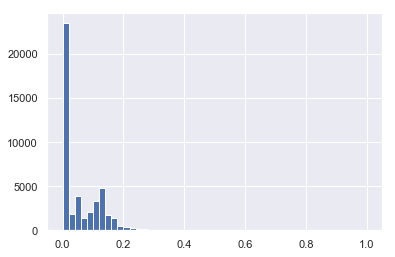

In [17]:
plt.hist(loan_data_default['recovery_rate'], bins = 50)

(array([  20.,   60.,   31.,   98.,   72.,   84.,  150.,   78.,  124.,
         170.,  153.,  208.,  200.,  228.,  242.,  276.,  300.,  335.,
         339.,  376.,  413.,  421.,  505.,  505.,  575.,  585.,  614.,
         735.,  756.,  815.,  840.,  943.,  959., 1137., 1217., 1418.,
        1432., 1580., 1734., 1858., 2010., 2192., 2226., 2533., 2626.,
        2958., 2808., 2708., 2139., 1223.]),
 array([4.3800000e-04, 2.0429240e-02, 4.0420480e-02, 6.0411720e-02,
        8.0402960e-02, 1.0039420e-01, 1.2038544e-01, 1.4037668e-01,
        1.6036792e-01, 1.8035916e-01, 2.0035040e-01, 2.2034164e-01,
        2.4033288e-01, 2.6032412e-01, 2.8031536e-01, 3.0030660e-01,
        3.2029784e-01, 3.4028908e-01, 3.6028032e-01, 3.8027156e-01,
        4.0026280e-01, 4.2025404e-01, 4.4024528e-01, 4.6023652e-01,
        4.8022776e-01, 5.0021900e-01, 5.2021024e-01, 5.4020148e-01,
        5.6019272e-01, 5.8018396e-01, 6.0017520e-01, 6.2016644e-01,
        6.4015768e-01, 6.6014892e-01, 6.8014016e-01, 7.0

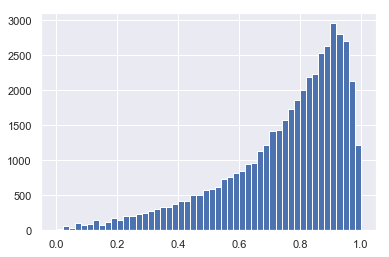

In [18]:
plt.hist(loan_data_default['CCF'], bins = 50)

For recovery rate, we can see that more than half of the values are equal to zero. Hence, we can use a two-stage approach.
1. Is the recovery rate equal to zero
2. If greater than 0, then how much is it ?

In [20]:
loan_data_default['recover_rate_binary'] = np.where((loan_data_default['recovery_rate'] == 0), 0, 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
features_all = ['grade',
'home_ownership',
'verification_status',
'purpose',
'initial_list_status',
'emp_length_int', 
'term_int',
'mnths_since_earliest_cr_line',
'mnths_since_issue_d',
'int_rate', 
'installment',
'emp_length_int',
'inq_last_6mths',
'mths_since_last_delinq', 
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim',
'good_bad_loan',
'recovery_rate', 
'CCF',
'recover_rate_binary']

In [43]:
loan_data_default = loan_data_default[features_all]
loan_data_default.head()

,grade,home_ownership,verification_status,purpose,initial_list_status,emp_length_int,term_int,mnths_since_earliest_cr_line,mnths_since_issue_d,int_rate,...,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,good_bad_loan,recovery_rate,CCF,recover_rate_binary
1,C,RENT,Source Verified,car,f,0.0,60,252.0,100.0,15.27,...,0.0,3.0,0.0,4.0,0.0,2500.0,0,0.046832,0.817416,1
8,F,OWN,Source Verified,small_business,f,4.0,60,192.0,100.0,21.28,...,0.0,11.0,0.0,13.0,0.0,5600.0,0,0.033761,0.971068,1
9,B,RENT,Verified,other,f,0.0,60,187.0,100.0,12.69,...,0.0,2.0,0.0,3.0,0.0,5375.0,0,0.050100,0.874701,1
12,C,RENT,Source Verified,debt_consolidation,f,0.0,36,192.0,100.0,13.49,...,0.0,4.0,0.0,9.0,0.0,9000.0,0,0.049367,0.860429,1
14,B,RENT,Source Verified,other,f,3.0,36,347.0,100.0,10.65,...,0.0,14.0,0.0,29.0,0.0,10000.0,0,0.064510,0.456653,1


In [44]:
loan_data_default.dtypes

grade                            object
home_ownership                   object
verification_status              object
purpose                          object
initial_list_status              object
emp_length_int                  float64
term_int                          int64
mnths_since_earliest_cr_line    float64
mnths_since_issue_d             float64
int_rate                        float64
installment                     float64
emp_length_int                  float64
inq_last_6mths                  float64
mths_since_last_delinq          float64
mths_since_last_record          float64
open_acc                        float64
pub_rec                         float64
total_acc                       float64
acc_now_delinq                  float64
total_rev_hi_lim                float64
good_bad_loan                     int64
recovery_rate                   float64
CCF                             float64
recover_rate_binary               int32
dtype: object

In [46]:
loan_data_default_dummies = pd.get_dummies(loan_data_default, drop_first = True)
pd.options.display.max_columns = None
loan_data_default_dummies.head()

,emp_length_int,term_int,mnths_since_earliest_cr_line,mnths_since_issue_d,int_rate,installment,emp_length_int,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,good_bad_loan,recovery_rate,CCF,recover_rate_binary,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
1,0.0,60,252.0,100.0,15.27,59.83,0.0,5.0,0.0,0.0,3.0,0.0,4.0,0.0,2500.0,0,0.046832,0.817416,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4.0,60,192.0,100.0,21.28,152.39,4.0,2.0,0.0,0.0,11.0,0.0,13.0,0.0,5600.0,0,0.033761,0.971068,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0.0,60,187.0,100.0,12.69,121.45,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,5375.0,0,0.050100,0.874701,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12,0.0,36,192.0,100.0,13.49,305.38,0.0,1.0,0.0,0.0,4.0,0.0,9.0,0.0,9000.0,0,0.049367,0.860429,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
14,3.0,36,347.0,100.0,10.65,325.74,3.0,2.0,0.0,0.0,14.0,0.0,29.0,0.0,10000.0,0,0.064510,0.456653,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### LGD Model

#### Splitting the data

In [21]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(loan_data_default_dummies.drop(['good_bad_loan', 'recovery_rate', 'recover_rate_binary','CCF'], axis = 1),
                                                   loan_data_default_dummies['recover_rate_binary'], test_size = 0.2, random_state = 1234)

In [67]:
pd.DataFrame(y_train).head()

,recover_rate_binary
113643,1
28152,1
446868,0
343159,0
359122,0


In [70]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
pd.options.display.max_rows = None
reg.fit(X_train, y_train)


features = X_train.columns.values
summary_table = pd.DataFrame(columns = ['Features'], data = features)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features,Coefficients
0,Intercept,-5.444066e-04
1,emp_length_int,-1.691047e-03
2,term_int,-1.250687e-02
3,mnths_since_earliest_cr_line,-1.883509e-03
4,mnths_since_issue_d,1.966702e-02
5,int_rate,-3.331829e-03
6,installment,4.240556e-04
7,emp_length_int,-1.691047e-03
8,inq_last_6mths,3.048654e-04
9,mths_since_last_delinq,-8.298506e-04


In [71]:
y_pred = reg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
y_prob_pred = reg.predict_proba(X_test)
y_prob_pred

array([[0.38368909, 0.61631091],
       [0.38345925, 0.61654075],
       [0.32105537, 0.67894463],
       ...,
       [0.34965014, 0.65034986],
       [0.37769196, 0.62230804],
       [0.31484336, 0.68515664]])

In [74]:
y_prob_pred = y_prob_pred[:][:, 1]
y_prob_pred

array([0.61631091, 0.61654075, 0.67894463, ..., 0.65034986, 0.62230804,
       0.68515664])

In [75]:
y_test_temp = y_test
y_test_temp.reset_index(drop = True, inplace = True)
df_pred = pd.concat([y_test_temp, pd.DataFrame(y_prob_pred)], axis = 1)
df_pred.columns = ['Actual', 'Pred_Prob']
df_pred.index = y_test.index
df_pred.head()

,Actual,Pred_Prob
0,1,0.616311
1,1,0.616541
2,0,0.678945
3,1,0.717883
4,0,0.451195


#### Accuracy of the model

In [76]:
th = 0.5
df_pred['Predicted'] = np.where((df_pred['Pred_Prob'] > th), 1, 0)

In [77]:
pd.crosstab(df_pred['Actual'], df_pred['Predicted'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,1850,2475
1,1208,3669


In [82]:
accuracy = ((pd.crosstab(df_pred['Actual'], df_pred['Predicted'], rownames = ['Actual'], colnames = ['Predicted'])[1][1]) + (pd.crosstab(df_pred['Actual'], df_pred['Predicted'], rownames = ['Actual'], colnames = ['Predicted'])[1][1]))*100/df_pred.shape[0]
accuracy

79.7435340143447

#### ROC curve

Text(0.5, 1.0, 'ROC Curve')

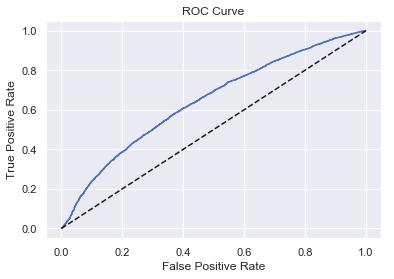

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(df_pred['Actual'], df_pred['Pred_Prob'])

import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [87]:
auc = roc_auc_score(df_pred['Actual'], df_pred['Pred_Prob'])
auc

0.642361870808004

As we are going to use this model to predict LGD values, it is more essential to accurately classify larger not-zero values than zeroes. It is because during the 2nd stage of the model, values classified as greater than 1 may be estimated to be equal to zero, thus correcting the current misclassification.

### Saving the model

In [88]:
import pickle

In [89]:
pickle.dump(reg, open('reg_lgd_phase_1.sav', 'wb'))

### Stage 2 - Linear Regression

In [96]:
lgd_phase_2 = loan_data_default_dummies[loan_data_default['recover_rate_binary'] == 1]

In [98]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(lgd_phase_2.drop(['good_bad_loan','recovery_rate','recover_rate_binary','CCF'], axis = 1), 
                                                            lgd_phase_2['recovery_rate'], test_size = 0.2, random_state = 12)

In [99]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
import statsmodels.api as sm

model = sm.OLS(y_train_2, X_train_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          recovery_rate   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     708.6
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:39:27   Log-Likelihood:                 18749.
No. Observations:               19741   AIC:                        -3.742e+04
Df Residuals:                   19701   BIC:                        -3.710e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
emp_length_int                       9.278e-05   9.39e-05      0.988      0.323   -9.13e-05       0.000
term_int                                0.0006   7.09e-05      8.431      0.000       0.000       0.001
mnths_since_earliest_cr_line         5.503e-05   8.82e-06      6.237      0.000    3.77e-05    7.23e-05
mnths_since_issue_d                    -0.0009   4.26e-05    -21.175      0.000      -0.001      -0.001
int_rate                                0.0029      0.000      6.760      0.000       0.002       0.004
installment                         -1.555e-05   3.32e-06     -4.689      0.000    -2.2e-05   -9.05e-06
emp_length_int                       9.278e-05   9.39e-05      0.988      0.323   -9.13e-05       0.000
inq_last_6mths                          0.0011      0.001      2.010      0.044    2.69e-05       0.002
mths_since_last_delinq              -3.502e-06   3.04e-05     -0.115      0.908   -6.31e-05    5.61e-05
mths_since_last_record              -4.093e-05   4.18e-05     -0.978      0.328      -0.000    4.11e-05
open_acc                               -0.0007      0.000     -3.546      0.000      -0.001      -0.000
pub_rec                                 0.0057      0.003      2.121      0.034       0.000       0.011
total_acc                               0.0005   8.75e-05      5.848      0.000       0.000       0.001
acc_now_delinq                          0.0078      0.011      0.711      0.477      -0.014       0.029
total_rev_hi_lim                     2.951e-07   4.05e-08      7.287      0.000    2.16e-07    3.74e-07
grade_B                                 0.0094      0.004      2.522      0.012       0.002       0.017
grade_C                                 0.0064      0.005      1.406      0.160      -0.003       0.015
grade_D                                 0.0004      0.006      0.067      0.947      -0.010       0.011
grade_E                                -0.0016      0.007     -0.242      0.808      -0.014       0.011
grade_F                                -0.0050      0.008     -0.647      0.517      -0.020       0.010
grade_G                                -0.0066      0.009     -0.726      0.468      -0.024       0.011
home_ownership_NONE                     0.1294      0.038      3.378      0.001       0.054       0.204
home_ownership_OTHER                    0.0304      0.020      1.511      0.131      -0.009       0.070
home_ownership_OWN                      0.0071      0.002      2.875      0.004       0.002       0.012
home_ownership_RENT                     0.0025      0.002      1.616      0.106      -0.001       0.005
verification_status_Source Verified    -0.0012      0.002     -0.623      0.533      -0.005       0.003
verification_status_Verified           -0.0015      0.002     -0.84

#### Linear Regression Model Evaluation

In [101]:
y_pred_2 = model.predict(X_test_2)

In [102]:
pd.concat([y_test_2, pd.DataFrame(y_pred_2)], axis = 1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.267186
0,0.267186,1.000000


In [104]:
pickle.dump(model, open('reg_lgd_phase_2.sav', 'wb'))

### Combine both the logistic as well as the regression model

In [105]:
y_pred_all = model.predict(X_test)

In [107]:
len(y_pred_all)

9202

In [108]:
y_pred_final = y_pred * y_pred_all

In [109]:
pd.DataFrame(y_pred_final).describe()

,0
count,9202.000000
mean,0.068278
std,0.052804
min,-0.051708
25%,0.000000
50%,0.088453
75%,0.111877
max,0.173544


In [110]:
y_pred_final = np.where(y_pred_final < 0, 0, y_pred_final)
pd.DataFrame(y_pred_final).describe()

,0
count,9202.000000
mean,0.068349
std,0.052689
min,0.000000
25%,0.000000
50%,0.088453
75%,0.111877
max,0.173544


### EAD Model

#### Estimation and Interpretation

In [111]:
X_train_ead, X_test_ead, y_train_ead, y_test_ead = train_test_split(loan_data_default_dummies.drop(['good_bad_loan','recovery_rate','recover_rate_binary','CCF'], axis = 1), 
                                                            loan_data_default_dummies['CCF'], test_size = 0.2, random_state = 12)

In [115]:
print(X_train_ead.shape)
print(y_train_ead.shape)

(36807, 41)
(36807,)


In [116]:
import statsmodels.api as sm

model_ead = sm.OLS(y_train_ead, X_train_ead).fit()
model_ead.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCF   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.618e+04
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:21:08   Log-Likelihood:                 11012.
No. Observations:               36807   AIC:                        -2.194e+04
Df Residuals:                   36767   BIC:                        -2.160e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
emp_length_int                         -0.0005      0.000     -3.749      0.000      -0.001      -0.000
term_int                                0.0060   9.81e-05     61.067      0.000       0.006       0.006
mnths_since_earliest_cr_line         7.502e-05   1.21e-05      6.208      0.000    5.13e-05    9.87e-05
mnths_since_issue_d                    -0.0022    5.9e-05    -37.211      0.000      -0.002      -0.002
int_rate                                0.0070      0.001     11.429      0.000       0.006       0.008
installment                           1.74e-06   4.56e-06      0.382      0.703    -7.2e-06    1.07e-05
emp_length_int                         -0.0005      0.000     -3.749      0.000      -0.001      -0.000
inq_last_6mths                          0.0091      0.001     11.827      0.000       0.008       0.011
mths_since_last_delinq              -9.302e-05   4.24e-05     -2.196      0.028      -0.000      -1e-05
mths_since_last_record              -6.009e-05   5.14e-05     -1.168      0.243      -0.000    4.07e-05
open_acc                               -0.0005      0.000     -1.819      0.069      -0.001    3.78e-05
pub_rec                                 0.0167      0.003      5.130      0.000       0.010       0.023
total_acc                               0.0006      0.000      5.287      0.000       0.000       0.001
acc_now_delinq                          0.0282      0.014      1.947      0.051      -0.000       0.057
total_rev_hi_lim                     2.423e-07   4.67e-08      5.192      0.000    1.51e-07    3.34e-07
grade_B                                 0.0648      0.005     12.510      0.000       0.055       0.075
grade_C                                 0.0727      0.006     11.515      0.000       0.060       0.085
grade_D                                 0.0696      0.008      9.015      0.000       0.054       0.085
grade_E                                 0.0618      0.009      6.649      0.000       0.044       0.080
grade_F                                 0.0497      0.011      4.456      0.000       0.028       0.072
grade_G                                 0.0401      0.013      3.052      0.002       0.014       0.066
home_ownership_NONE                     0.0508      0.073      0.693      0.488      -0.093       0.194
home_ownership_OTHER                   -0.0183      0.033     -0.556      0.578      -0.083       0.046
home_ownership_OWN                      0.0233      0.003      6.686      0.000       0.016       0.030
home_ownership_RENT                     0.0288      0.002     13.684      0.000       0.025       0.033
verification_status_Source Verified     0.0238      0.003      8.992      0.000       0.019       0.029
verification_status_Verified           -0.0016      0.003     -0.61

#### Model Validation

In [117]:
y_pred_ead = model_ead.predict(X_test_ead)
pd.concat([y_test_ead, pd.DataFrame(y_pred_ead)], axis = 1).corr()

,CCF,0
CCF,1.000000,0.452545
0,0.452545,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


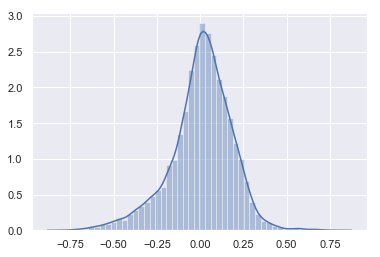

In [119]:
sns.distplot(y_test_ead - y_pred_ead)

In [120]:
pd.DataFrame(y_pred_ead).describe()

,0
count,9202.000000
mean,0.745139
std,0.117308
min,0.055641
25%,0.669082
50%,0.735602
75%,0.836579
max,1.057227


In [121]:
y_pred_ead = np.where(y_pred_ead > 1, 1, y_pred_ead)
pd.DataFrame(y_pred_ead).describe()

,0
count,9202.000000
mean,0.745115
std,0.117252
min,0.055641
25%,0.669082
50%,0.735602
75%,0.836579
max,1.000000
